In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATHS = [
    "ppo_gs_l3_6.csv",
    "ppo_gs_l3_25.csv",
    "ppo_gs_l3_40.csv",
    "ppo_gs_l3_103.csv",
    "ppo_gs_l3_111.csv",
]
NAMES = [
    "Baseline level 2",
    "Learning rate schedule",
    "No body rate constraint",
    "Doubled look-ahead",
    "Lower learning rate",
]

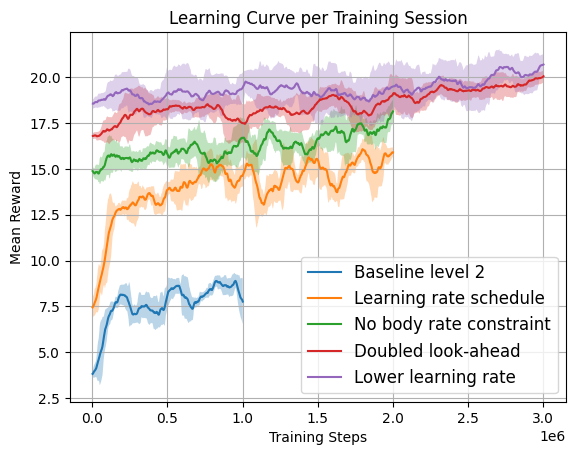

In [3]:
def create_learning_curve_plot(data_paths: list):
    n_models = len(data_paths)
    mean_rewards = []

    # collect and sort saved data
    for i, path in enumerate(data_paths):
        data = np.genfromtxt(path, delimiter=',')[1:, 1:]
        mean_rewards.append(data)

    handles = []
    for i in range(n_models):
        xs = mean_rewards[i][:, 0]
        ys = mean_rewards[i][:, 1]
        ys = np.pad(ys, 20, mode="edge")[:-1]
        window = np.lib.stride_tricks.sliding_window_view(ys, 40)
        ys_mean = np.mean(window, axis=-1)
        ys_std = np.clip(np.var(window, axis=-1), 0, 5)
        plt.fill_between(xs, ys_mean-ys_std, ys_mean+ys_std, alpha=0.3)
        line, = plt.plot(xs, ys_mean)
        handles.append(line)
    plt.title("Learning Curve per Training Session")
    plt.legend(handles, NAMES, fontsize="large")
    plt.xlabel("Training Steps")
    plt.ylabel("Mean Reward")
    plt.grid()
    plt.show()

create_learning_curve_plot(PATHS)